In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anemia-detection-dataset/anemia_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/anemia-detection-dataset/anemia_dataset.csv",index_col=0)

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
Number,,,,,,,,,,,,,
1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(104, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          104 non-null    object 
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
 6   Unnamed: 7    0 non-null      float64
 7   Unnamed: 8    0 non-null      float64
 8   Unnamed: 9    0 non-null      float64
 9   Unnamed: 10   0 non-null      float64
 10  Unnamed: 11   0 non-null      float64
 11  Unnamed: 12   0 non-null      float64
 12  Unnamed: 13   1 non-null      object 
dtypes: float64(10), object(3)
memory usage: 11.4+ KB


In [6]:
df.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],inplace=True)

In [7]:
df.head()

,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
Number,,,,,,
1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
2,khadiza,45.6033,28.1900,26.2067,13.5,No
3,Lalu,45.0107,28.9677,26.0215,11.7,No
4,Mira nath,44.5398,28.9899,26.4703,13.5,No
5,monoara,43.2870,30.6972,26.0158,12.4,No


In [8]:
df.isnull().sum()

Name            0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [9]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


# Outliers:

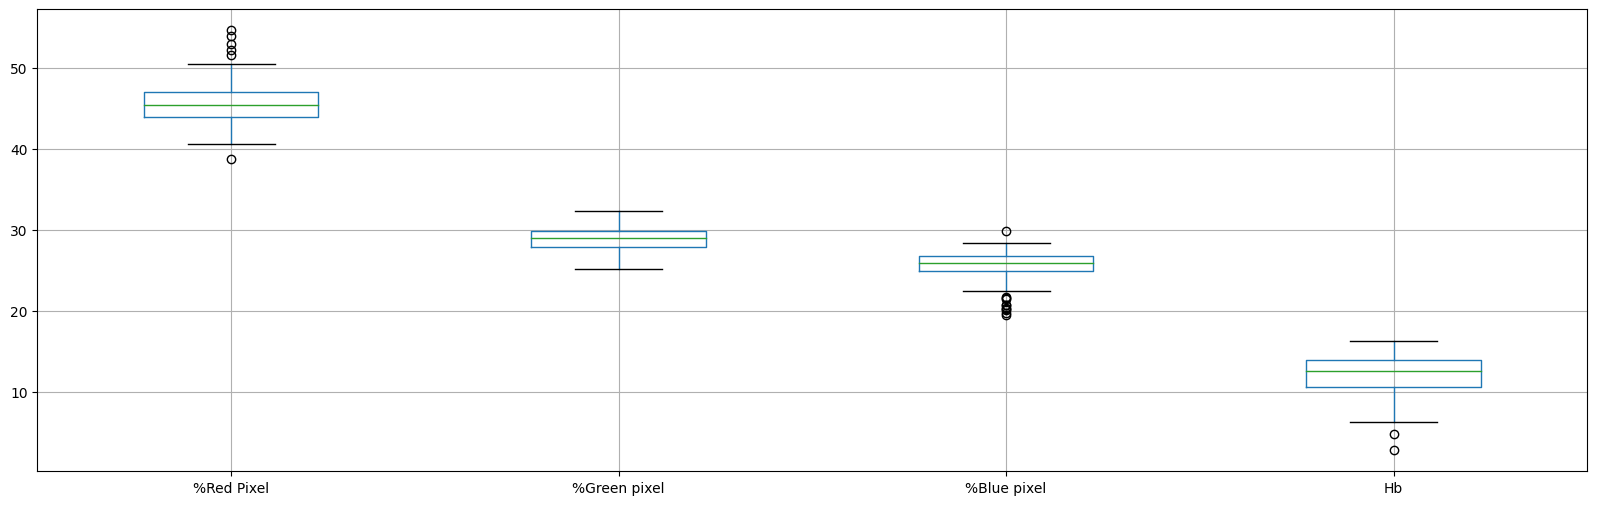

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=(20,6))
plt.show()

### Outlier handling for RedPixel

In [11]:
q1=df['%Red Pixel'].quantile(0.25)
q3=df['%Red Pixel'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers = df['%Red Pixel'][(df['%Red Pixel']<lower_bound) | (df['%Red Pixel']>upper_bound)]
print(outliers)

Number
65    38.7968
73    52.9108
76    53.9113
89    54.6478
96    52.1540
97    51.5802
Name: %Red Pixel, dtype: float64


In [12]:
# handling outliers
df['%Red Pixel']=df['%Red Pixel'].apply(lambda x:lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))

In [13]:
df['%Red Pixel'].head()

Number
1    43.2555
2    45.6033
3    45.0107
4    44.5398
5    43.2870
Name: %Red Pixel, dtype: float64